In [2]:
import numpy as np
from keras.datasets import boston_housing
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Loading the Boston housing dataset

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [4]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [17]:
 np.count_nonzero(train_data[42]) 

11

In [20]:
train_targets[3]

21.1

In [21]:
train_data[42] 

array([5.0830e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01,
       6.3160e+00, 3.8100e+01, 6.4584e+00, 5.0000e+00, 2.2400e+02,
       2.0200e+01, 3.8971e+02, 5.6800e+00])

# Normalizing the data

In [22]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Building your network

In [25]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# Validating your approach using K-fold validation

In [26]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []

In [28]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
         [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
         axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [36]:
all_scores

[2.629143476486206, 2.713118553161621, 2.5826797485351562, 2.7579989433288574]

In [37]:
np.mean(all_scores)

2.67073518037796

In [48]:
num_epochs = 50
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(        
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=1)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/50
303/303 [==============================] - 0s 1ms/step - loss: 228.9825 - mae: 11.4985 - val_loss: 39.2727 - val_mae: 3.9706
Epoch 2/50
303/303 [==============================] - 0s 1ms/step - loss: 30.4596 - mae: 3.8174 - val_loss: 28.1104 - val_mae: 3.2708
Epoch 3/50
303/303 [==============================] - 0s 1ms/step - loss: 22.0167 - mae: 3.2280 - val_loss: 20.1091 - val_mae: 2.7947
Epoch 4/50
303/303 [==============================] - 0s 1ms/step - loss: 18.6269 - mae: 2.9006 - val_loss: 18.1482 - val_mae: 2.8426
Epoch 5/50
303/303 [==============================] - 0s 1ms/step - loss: 16.5625 - mae: 2.7997 - val_loss: 16.1675 - val_mae: 2.5389
Epoch 6/50
303/303 [==============================] - 0s 2ms/step - loss: 15.6731 - mae: 2.6432 - val_loss: 14.3951 - val_mae: 2.4744
Epoch 7/50
303/303 [==============================] - 0s 2ms/step - loss: 14.1350 - mae: 2.5124 - val_loss: 12.9821 - val_mae: 2.5523
Epoch 8/50
303/303 [====================

303/303 [==============================] - 0s 1ms/step - loss: 10.3713 - mae: 2.1575 - val_loss: 10.3740 - val_mae: 2.4815
Epoch 13/50
303/303 [==============================] - 0s 1ms/step - loss: 10.1612 - mae: 2.1678 - val_loss: 11.9770 - val_mae: 2.7356
Epoch 14/50
303/303 [==============================] - 0s 1ms/step - loss: 9.7718 - mae: 2.1278 - val_loss: 12.0803 - val_mae: 2.7771
Epoch 15/50
303/303 [==============================] - 0s 1ms/step - loss: 9.7268 - mae: 2.1361 - val_loss: 10.1522 - val_mae: 2.5057
Epoch 16/50
303/303 [==============================] - 0s 1ms/step - loss: 9.0641 - mae: 2.0221 - val_loss: 9.2526 - val_mae: 2.4309
Epoch 17/50
303/303 [==============================] - 0s 1ms/step - loss: 9.4508 - mae: 2.0631 - val_loss: 9.8755 - val_mae: 2.4708
Epoch 18/50
303/303 [==============================] - 0s 1ms/step - loss: 8.9922 - mae: 2.0360 - val_loss: 9.7694 - val_mae: 2.4276
Epoch 19/50
303/303 [==============================] - 0s 1ms/step - loss: 

303/303 [==============================] - 0s 2ms/step - loss: 7.4806 - mae: 1.7329 - val_loss: 11.7608 - val_mae: 2.3604
Epoch 35/50
303/303 [==============================] - 0s 1ms/step - loss: 7.5050 - mae: 1.8026 - val_loss: 13.6442 - val_mae: 2.6115
Epoch 36/50
303/303 [==============================] - 0s 1ms/step - loss: 7.1076 - mae: 1.8018 - val_loss: 13.1354 - val_mae: 2.5205
Epoch 37/50
303/303 [==============================] - 0s 1ms/step - loss: 7.0036 - mae: 1.7108 - val_loss: 12.8661 - val_mae: 2.5158
Epoch 38/50
303/303 [==============================] - 0s 1ms/step - loss: 6.9748 - mae: 1.7587 - val_loss: 12.4157 - val_mae: 2.4667
Epoch 39/50
303/303 [==============================] - 1s 2ms/step - loss: 7.2859 - mae: 1.7808 - val_loss: 13.4054 - val_mae: 2.6337
Epoch 40/50
303/303 [==============================] - 0s 1ms/step - loss: 6.9030 - mae: 1.7187 - val_loss: 13.6700 - val_mae: 2.7063
Epoch 41/50
303/303 [==============================] - 0s 1ms/step - loss:

In [49]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

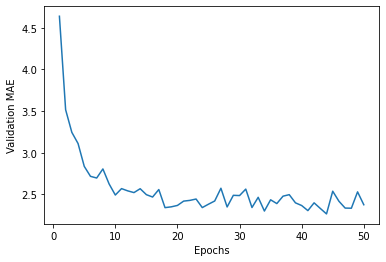

In [51]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Training the final model

In [56]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 17.2463 - mae: 2.6610


In [57]:
test_mae_score

2.6609795093536377

In [48]:
pred = np.random.normal(0,1,13)
pred=np.expand_dims(pred, axis=0)
pred.shape

(1, 13)

In [49]:
prediction = model.predict(pred)
prediction

array([[36.372295]], dtype=float32)

In [165]:
model.save('boston_house.h5')

# for practice

In [47]:
model= models.load_model('boston_house.h5')

In [59]:
value= np.float32([1,1,1,1,1,1,1,1,1,1,1])
value=np.expand_dims(value, axis=0)
prediction[0,0]

36.372295

In [45]:
value= np.float32([1,2])
value = np.append(value, 3)
mean = value.mean()
value -= mean
std = value.std()
value /= std
value= np.float32([1,1,1,1,1,1,1,1,1,1,1])
value = np.append(value, )
value=np.expand_dims(value, axis=0)
print(value,mean, std)

(1, 13)
